### 数组的转置和轴对换

In [1]:
import numpy as np

* 转置可以使用transpose()方法，也可以使用T属性

In [2]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [3]:
arr.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [4]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

* 在矩阵计算时经常使用转置操作，比如，计算矩阵的内积np.dot()

In [5]:
arr = np.random.randn(4,3)
arr

array([[ 1.24971097, -1.15270121,  1.41855366],
       [-1.21579815,  0.67722079, -0.63992388],
       [-1.14607563,  0.59604011,  1.46181227],
       [ 0.39345074,  1.47096921,  0.55652236]])

In [6]:
np.dot(arr.T,arr)

array([[ 4.50823549, -2.36826025,  1.09441706],
       [-2.36826025,  4.3063623 , -0.37861226],
       [ 1.09441706, -0.37861226,  4.86840931]])

* 对于高维数组（>3），transpose需要得到一个由编号组成的元祖才能对这些轴进行转置

In [8]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [9]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

* swapaxes方法接收一对轴编号。swapaxes也是返回源数据的视图（不会进行任何复制操作

In [11]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [12]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

# 4.2通用函数：快速的元素级数组函数
* 通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器

In [14]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [16]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

* 上述方法也叫一元通用函数。下面介绍几个二元通用函数

In [17]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([-1.7266767 ,  1.2232217 ,  0.13346529,  0.20789797,  0.05153854,
       -1.39971978,  0.11192313,  0.00818701])

In [18]:
y

array([-0.58431702,  1.18389044,  0.23911619, -0.20529655, -0.22218649,
       -0.23151421, -1.83659486,  0.91349072])

In [21]:
np.maximum(x,y)# 返回对应位置元素的较大值

array([-0.58431702,  1.2232217 ,  0.23911619,  0.20789797,  0.05153854,
       -0.23151421,  0.11192313,  0.91349072])

* modf可以返回多个数组，它会返回浮点数的整数部分和小数部分

In [22]:
arr = np.random.randn(7)*5
arr

array([  2.11214818,   5.9728119 ,  -0.25401792, -10.69556551,
        -2.15374894,  -0.32658578,  -2.63945653])

In [25]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.11214818,  0.9728119 , -0.25401792, -0.69556551, -0.15374894,
       -0.32658578, -0.63945653])

In [26]:
whole_part

array([  2.,   5.,  -0., -10.,  -2.,  -0.,  -2.])

### 下表是一些常见的函数
![一元1](https://upload-images.jianshu.io/upload_images/7178691-1d494e73b61c7ced.png)
![一元2](https://upload-images.jianshu.io/upload_images/7178691-2be79faf68ab6ff8.png)
![一元3](https://upload-images.jianshu.io/upload_images/7178691-4e38d02a66481530.png)

### 二元函数
![二元1](https://upload-images.jianshu.io/upload_images/7178691-eff1e61e5464159f.png)
![二元2](https://upload-images.jianshu.io/upload_images/7178691-eff1e61e5464159f.png)

## 4.3 利用数组进行数据处理
* 用数组表达式代替循环的做法，通常被称为矢量化

* np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所有的(x,y)对）

In [27]:
points = np.arange(-5,5,0.01)
xs,ys = np.meshgrid(points,points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [32]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

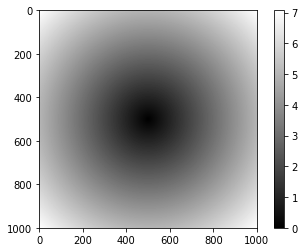

In [34]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()

### 将条件逻辑表述为数组运算
* numpy.where函数是三元表达式x if condition else y的矢量化版本。

In [37]:
xarr = np.array([1.2,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])
result = [(x if c else y) for x,y,c in zip(xarr, yarr, cond)]
result

[1.2, 2.2, 1.3, 1.4, 2.5]

In [39]:
# 使用where（）改进
result = np.where(cond,xarr,yarr)
result

array([1.2, 2.2, 1.3, 1.4, 2.5])

* np.where的第二个和第三个参数不必是数组，它们都可以是标量值。在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。

In [41]:
arr = np.random.randn(4,4)
arr > 0

array([[False, False, False, False],
       [False,  True,  True, False],
       [ True,  True, False,  True],
       [ True, False,  True, False]])

In [42]:
arr

array([[-0.02459259, -0.6428239 , -0.76112065, -2.14235712],
       [-0.10120677,  0.14290032,  0.56280688, -1.39125445],
       [ 0.39828175,  0.07024995, -1.22357901,  0.90811459],
       [ 0.83422951, -0.10858237,  0.90184316, -2.57063453]])

In [43]:
np.where(arr>0,2,-2)

array([[-2, -2, -2, -2],
       [-2,  2,  2, -2],
       [ 2,  2, -2,  2],
       [ 2, -2,  2, -2]])

* 也可以将标量和数组结合起来

In [44]:
np.where(arr>0,2,arr)

array([[-0.02459259, -0.6428239 , -0.76112065, -2.14235712],
       [-0.10120677,  2.        ,  2.        , -1.39125445],
       [ 2.        ,  2.        , -1.22357901,  2.        ],
       [ 2.        , -0.10858237,  2.        , -2.57063453]])

### 数学和统计方法
* sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数使用。

In [47]:
arr = np.random.randn(5,4)
arr

array([[ 0.31996205,  0.69908917,  1.60390967, -0.41760093],
       [-0.36385331, -0.2618905 ,  1.15295921, -0.10163846],
       [ 1.28356236,  0.45163684,  0.3690968 , -0.81384686],
       [ 0.14891047,  0.75320511, -1.49658404,  0.61913003],
       [ 0.0395804 ,  0.97813093,  1.96525592, -1.07168954]])

In [48]:
arr.mean()

0.2928662657820542

In [49]:
np.mean(arr)

0.2928662657820542

In [50]:
arr.sum()

5.857325315641084

In [52]:
np.sum(arr)

5.857325315641084

* mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组
*  axis = 1,按行计算；axis=0,按列计算

In [53]:
arr.mean(axis=1)

array([0.55133999, 0.10639423, 0.32261228, 0.00616539, 0.47781943])

In [54]:
arr.sum(axis=0)

array([ 1.42816197,  2.62017154,  3.59463756, -1.78564575])

* cumsum和cumprod之类的方法则不聚合，而是产生一个由中间结果组成的数组

In [56]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [58]:
arr.cumsum()# 后一个元素值是其位置前面元素的和

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

* 在多维数组中，累加函数（如cumsum）返回的是同样大小的数组，但是会根据每个低维的切片沿着标记轴计算部分聚类：

In [61]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [62]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

### 表4-5列出了全部的基本数组统计方法

![1](https://upload-images.jianshu.io/upload_images/7178691-a6c6df3ca8e0b98e.png)
![2](https://upload-images.jianshu.io/upload_images/7178691-866fcde885b1d357.png)

### 用于布尔型数组的方法
* 在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum经常被用来对布尔型数组中的True值计数：

In [66]:
arr = np.random.randn(100)
(arr > 0).sum()# 用于计算arr中大于零的值的个数

47

* any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True：
* 这两个方法也能用于非布尔型数组，所有非0元素将会被当做True。

In [67]:
bools = np.array([True,False,True,True,False])
bools.any()

True

In [68]:
bools.all()

False

### 排序

In [69]:
arr = np.random.randn(6)
arr

array([ 1.02405122, -0.6697276 , -0.21968547, -0.72406011,  0.1925428 ,
        0.07636505])

In [71]:
arr.sort()
arr

array([-0.72406011, -0.6697276 , -0.21968547,  0.07636505,  0.1925428 ,
        1.02405122])

* 多维数组可以在任何一个轴向上进行排序，只需将轴编号传给sort即可：

In [72]:
arr = np.random.randn(5,3)
arr

array([[ 0.71087653,  0.07317549, -0.5169106 ],
       [-0.79285818,  0.2562815 ,  0.52803003],
       [ 0.32807348, -0.15266984, -0.65285013],
       [-0.06786031,  2.69566713, -0.44730785],
       [ 0.42299494,  0.95989471, -0.51781003]])

In [75]:
arr.sort(axis=1)# 按行排序

In [74]:
arr

array([[-0.5169106 ,  0.07317549,  0.71087653],
       [-0.79285818,  0.2562815 ,  0.52803003],
       [-0.65285013, -0.15266984,  0.32807348],
       [-0.44730785, -0.06786031,  2.69566713],
       [-0.51781003,  0.42299494,  0.95989471]])

* 顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进行排序，然后选取特定位置的值：

In [77]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))]

-1.7547949961699647

### 唯一化以及其它的集合逻辑
* np.unique，它用于找出数组中的唯一值并返回已排序的结果：

In [79]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [80]:
nums = np.array([1,2,3,2,6,4,5,4,10])
np.unique(nums)

array([ 1,  2,  3,  4,  5,  6, 10])

* 另一个函数np.inld用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

In [81]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

#### NumPy中的集合函数请参见表4-6

![3](https://upload-images.jianshu.io/upload_images/7178691-80e85ae6b9c89ada.png)